# Python for Data Science

## Lecture 3: NumPy


### Python Scientific stack
|   Package |    |
| --- | --- |
| **NumPy** | **Efficient N-dimensional arrays** |
| SciPy | Numerical methods |
| Matplotlib | Graphs and plots  |
| IPython (Jupyter) | Interactive notebooks |
| SymPy | Symbolical computations |
| Pandas | Data mining |

# Numpy


One of the basic Python Scientific stack libraries

https://numpy.org/

* Linear algebra, Fourier transformations, random numbers
* Efficient, easy to use matrices and arrays
* Highly optimized
* C/C++/Fortran integration

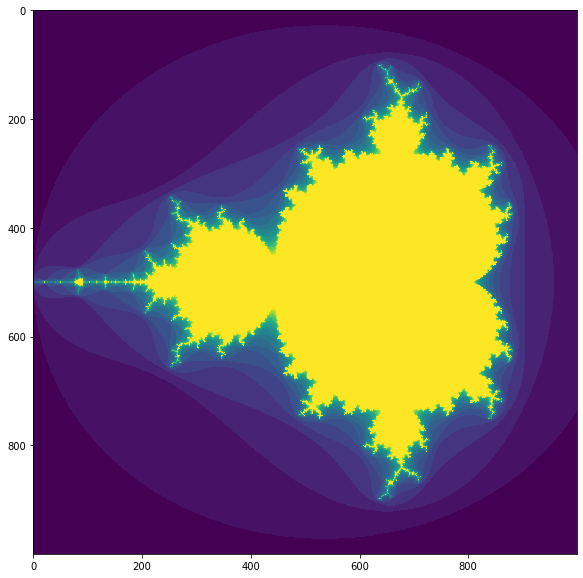

### Importing conventionally: `import numpy as np` 

In [1]:
import numpy as np

# N-dimensional arrays

The central object of NumPy is the `ndarray` (_$n$-dimensonal array_).

In [2]:
A = np.array([[1, 2], [3, 4], [5, 6]])     
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [3]:
type(A)

numpy.ndarray

`A.shape` is a tuple containing the dimensions (shape) of the array

In [4]:
A.shape

(3, 2)

Contrary to Python lists, you cannot store every type of item in a NumPy array.
The `dtype` will provide you the type of the stored items.

In [5]:
A.dtype

dtype('int64')

In [6]:
a=10**30            #This works fine
#A[0,0]=10**30      #This would be too big


In [7]:
A = np.array([1.5, 2])
A.dtype

dtype('float64')

## Accessing the items

Indexes start from 0 as always

#### One line:

In [8]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A[0], A[1]

(array([1, 2]), array([3, 4]))

#### One column:

In [9]:
A[:, 0]

array([1, 3, 5])

#### One item:

In [10]:
A[2, 1], type(A[2, 1])

(6, numpy.int64)

#### Some lines or columns

In [11]:
A[:2]  # same as A[:2, :]

array([[1, 2],
       [3, 4]])

In [12]:
A[:, 1:]

array([[2],
       [4],
       [6]])

In [13]:
A[::2]

array([[1, 2],
       [5, 6]])

In [14]:
B = np.array([[[1, 2, 3],[4, 5, 6]]])
B.shape, B.ndim

((1, 2, 3), 3)

In [15]:
B

array([[[1, 2, 3],
        [4, 5, 6]]])

In [16]:
B[0].shape

(2, 3)

In [17]:
B[0, 1], B[0, 1].shape

(array([4, 5, 6]), (3,))

In [18]:
B[0, 1, 2]

6

# Operations

## Item-level operations

You can use arithmetical operators on numpy arrays, which will have effect on all items in the array.

In [19]:
A = np.array([[1, 1], [2, 2]])
P = A >= 2
print(P)
print(P.dtype)

[[False False]
 [ True  True]]
bool


In [20]:
A + A

array([[2, 2],
       [4, 4]])

In [21]:
A * A

array([[1, 1],
       [4, 4]])

The most commoly used mathematical functions are also availabel, and have an item level effect as well.

In [22]:
np.exp(A)

array([[2.71828183, 2.71828183],
       [7.3890561 , 7.3890561 ]])

In [23]:
np.sin(A*np.pi/6)

array([[0.5      , 0.5      ],
       [0.8660254, 0.8660254]])

In [24]:
2**A

array([[2, 2],
       [4, 4]])

In [25]:
1/A

array([[1. , 1. ],
       [0.5, 0.5]])

In [26]:
A=np.array([1,1,1,0]) & np.array([1,0,1,1]) 
A

array([1, 0, 1, 0])

In [27]:
A=np.array([1,1,1,0]) | np.array([1,0,1,1]) 
A

array([1, 1, 1, 1])

## Matrix operations

The `dot` applies the usual matrix multiplication 

In [28]:
A = np.array([[1, 2], [3, 4]])
A.dot(A)

array([[ 7, 10],
       [15, 22]])

In [29]:
A @ A

array([[ 7, 10],
       [15, 22]])

The required dimensions have to match!

In [30]:
B = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape, B.shape)
A.dot(B)
#B.dot(A)

(2, 2) (2, 3)


array([[ 9, 12, 15],
       [19, 26, 33]])

Inversion is available, but as always, you need to consider the rounding errors

In [31]:
A_inv = np.linalg.inv(A)
print(A_inv)

A_inv.dot(A)

[[-2.   1. ]
 [ 1.5 -0.5]]


array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [32]:
np.round(A_inv.dot(A),5)

array([[1., 0.],
       [0., 1.]])

For a non-square matrix, you can use the pseudo-inverse

In [33]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A_pinv = np.linalg.pinv(A)

A.dot(A_pinv).dot(A)

array([[1., 2., 3.],
       [4., 5., 6.]])

(There is a  `matrix` class where `*` is the operator for matrix multiplicaton. However, this is planned to be removed from NumPy, so do not use!)

In [34]:
M = np.matrix([[1, 2], [3, 4]])
print(np.multiply(M, M))       # item by item
print(M * M)                   # usual matrix multiplication

[[ 1  4]
 [ 9 16]]
[[ 7 10]
 [15 22]]


# Casting

NumPy has the types of C available

In [35]:
P = np.array([[1.2, 1], [1.5, 0]])
print(P.dtype)
P.astype(int)

float64


array([[1, 1],
       [1, 0]])

In [36]:
(-P.astype(int)).astype("uint32")

array([[4294967295, 4294967295],
       [4294967295,          0]], dtype=uint32)

In [37]:
np.array([[1, 2], [3, 4]], dtype="float32")

array([[1., 2.],
       [3., 4.]], dtype=float32)

Strings can be converted to numbers:

In [38]:
np.float32('-10'), np.float32(-10)

(-10.0, -10.0)

You can specify a `dtype` when you create an array

In [39]:
np.array(['10', '20'], dtype="float32")

array([10., 20.], dtype=float32)

#### `np.datetime64`
You have a separate data type for date and time 

In [40]:
np.datetime64("2018-03-10")

numpy.datetime64('2018-03-10')

In [41]:
np.datetime64("2018-03-10") - np.datetime64("2017-12-13")

numpy.timedelta64(87,'D')

#### String arrays

In [42]:
T = np.array(['pear', 'apple'])
print(T)
print(T.shape, T.dtype, type(T))

['pear' 'apple']
(2,) <U5 <class 'numpy.ndarray'>


**The character arrays stored are FIXED LENGTH!!!**

In [43]:
T[1] = "banana"
T

array(['pear', 'banan'], dtype='<U5')

## Slicing, advanced indexing

The `:` will select everything from the given dimension

In [44]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)
print(A[0])
print(A[0, :]) # first row
print(A[:, 0])  # first column

[[1 2 3]
 [4 5 6]]
[1 2 3]
[1 2 3]
[1 4]


However, these are *1-dimensional arrays* and **not**  $1\times n$ or  $n\times1$ matrices.

In [45]:
A[0, :].shape, A[:, 0].shape

((3,), (2,))

In [46]:
B = np.array([[[1, 2, 3],[4, 5, 6]]])
B.shape

(1, 2, 3)

In [47]:
print(B[:, 1, :].shape)
B[:, 1, :]

(1, 3)


array([[4, 5, 6]])

In [48]:
B[0, 1, :], B[0, 1, :].shape

(array([4, 5, 6]), (3,))

In [49]:
type(B[0, 1, 1]), B[0, 1, 1]

(numpy.int64, 5)

Every Python indexing trick learnt so far works here too:

In [50]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [51]:
print(A[:, ::-1])
print(A[::-1, :])
print(A[:, ::2])

[[3 2 1]
 [6 5 4]]
[[4 5 6]
 [1 2 3]]
[[1 3]
 [4 6]]


## Advanced indexing using lists

You can use a list or array to specify which items you want to get


In [52]:
B = np.array(["a","b","c","d","e","f","g"])

In [53]:
np.array([B[0],B[3],B[4],B[6]])

array(['a', 'd', 'e', 'g'], dtype='<U1')

In [54]:
B[[0,3,4,6]]            #same, but faster

array(['a', 'd', 'e', 'g'], dtype='<U1')

In [55]:
B[np.array([0,3,4,6])]  #same, but by using an array

array(['a', 'd', 'e', 'g'], dtype='<U1')

This gets more complicated if we have multiple dimensions.

If we use only one array for indexing, the correspondent items will be selected from M's first coordinate dimension. 


In [56]:
M = np.arange(12).reshape(3,4)

In [57]:
M

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [58]:
np.array([[M[0],M[1]],[M[2],M[2]]])

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [ 8,  9, 10, 11]]])

In [59]:
M[np.array([[0,1],[2,2]])] #same, but faster

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [ 8,  9, 10, 11]]])

Using multiple index arrays: first coordinate will select the correspondent items from the first coordinate, second from the second... etc.

In [60]:
np.array([M[0][2],M[1][2],M[1][0]])

array([2, 6, 4])

In [61]:
np.array([M[0,2],M[1,2],M[1,0]])

array([2, 6, 4])

In [62]:
M[np.array([0,1,1]),np.array([2,2,0])] #same, but faster

array([2, 6, 4])

In [63]:
np.array([[M[0,1],M[1,0]],[M[2,1],M[2,3]]])

array([[ 1,  4],
       [ 9, 11]])

In [64]:
M[np.array([[0,1],[2,2]]),np.array([[1,0],[1,3]])]  #same, but faster

array([[ 1,  4],
       [ 9, 11]])

In [65]:
M[:,[1,3]]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

In [66]:
M[[1,2],:]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

We can select one row or column multiple times as well

In [67]:
M[[2,1,2],:]

array([[ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

You can read more on the more advanced indexing in more dimensions: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

## Changing the shape of an array

Using `reshape`, you can change the shape of an array without changing the items stored in the array. This does not even create duplicates in the background.

In [68]:
B = np.array([[[1, 2, 3], [4, 5, 6]]])
B.reshape((2, 3))

array([[1, 2, 3],
       [4, 5, 6]])

In [69]:
B.reshape((3, 2))

array([[1, 2],
       [3, 4],
       [5, 6]])

 `ValueError` is raised if we give an invalid shape

In [70]:
# B.reshape(7)  # raises ValueError

In [71]:
np.array(range(6)).reshape((1, 2, 3))

array([[[0, 1, 2],
        [3, 4, 5]]])

Use `-1` to make NumPy compute the required size of the given dimension, based on the number of items in the array.

In [72]:
X = np.array(range(12)).reshape((2, -1, 2))
print("X.shape:", X.shape)
print(X)

X.shape: (2, 3, 2)
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


You can use `resize` even if the number of items is not correct for the given shape. NumPy will delete items or fill empty spaces with zeros in this case. The original array will be modified!

In [73]:
X = np.array([[1, 2], [3, 4]])
X.resize((5, 3))
X.resize((1, 2))
X

array([[1, 2]])

However, `np.resize` works differently!

In [74]:
X = np.array([[1, 2], [3, 4]])
np.resize(X, (5, 3))

array([[1, 2, 3],
       [4, 1, 2],
       [3, 4, 1],
       [2, 3, 4],
       [1, 2, 3]])

This is not a method of the array! `X` is not modified in the process.

In [75]:
X

array([[1, 2],
       [3, 4]])

# Creating arrays

We rarely need to specify the items one by one, we have a selection of more efficient methods:

* `arange`: equivalent to range, but this creates an array instead of a list.
* `linspace`: equally divided interval
* `ones`, `ones_like`, all ones
* `zeros`, `zeros_like`, all zeros
* `eye`: identity matrix in 2 dimensions
* `fromfunction` create an array from function

The `np.ones_like()` and `np.zeros_like()` preserve shape and `dtype`.

In [76]:
np.arange(10), np.arange(10).shape

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), (10,))

In [77]:
np.arange(1, 21, 2).reshape(5, -1)

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11],
       [13, 15],
       [17, 19]])

In [78]:
np.linspace(0, 4, 11)

array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ])

In [79]:
np.ones((3, 2)) * 5

array([[5., 5.],
       [5., 5.],
       [5., 5.]])

In [80]:
np.zeros((2, 3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [81]:
A = np.arange(6).reshape(3, -1)
np.zeros_like(A)

array([[0, 0],
       [0, 0],
       [0, 0]])

In [82]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [83]:
np.eye(4, dtype=bool)

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

Useful feature: you can also define an array by the function of the indexes

In [84]:
np.fromfunction(lambda i, j: i == j, (3, 3), dtype=int)

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

In [85]:
np.fromfunction(lambda i,j: 100*i+j, (5,5))

array([[  0.,   1.,   2.,   3.,   4.],
       [100., 101., 102., 103., 104.],
       [200., 201., 202., 203., 204.],
       [300., 301., 302., 303., 304.],
       [400., 401., 402., 403., 404.]])

## Concatenation of arrays

Concatenations can be done based on any of the dimensions if the sizes match.

In [86]:
A = np.arange(6).reshape(2, -1)
B = np.arange(8).reshape(2, -1)

np.concatenate((A, B), axis=1)

array([[0, 1, 2, 0, 1, 2, 3],
       [3, 4, 5, 4, 5, 6, 7]])

In [87]:
np.concatenate((A, B), axis=-1)  # last dimension

array([[0, 1, 2, 0, 1, 2, 3],
       [3, 4, 5, 4, 5, 6, 7]])

In [88]:
 #np.concatenate((A, B))  # axis=0 is the default

As we concatenate mostly by the first or second axis, these have unique notations too:

In [89]:
A = np.arange(6).reshape(2, -1)
B = np.arange(8).reshape(2, -1)

In [90]:
np.hstack((A, B))

array([[0, 1, 2, 0, 1, 2, 3],
       [3, 4, 5, 4, 5, 6, 7]])

In [91]:
A = np.arange(6).reshape(-1, 2)
B = np.arange(8).reshape(-1, 2)
print(A.shape, B.shape)

np.vstack((A, B))

(3, 2) (4, 2)


array([[0, 1],
       [2, 3],
       [4, 5],
       [0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [92]:
A.T

array([[0, 2, 4],
       [1, 3, 5]])

`np.stack` puts the arrays next to each other in a new dimension

In [93]:
A.shape, np.stack((A, A, A, A)).shape

((3, 2), (4, 3, 2))

In [94]:
np.stack((A, A, A, A))

array([[[0, 1],
        [2, 3],
        [4, 5]],

       [[0, 1],
        [2, 3],
        [4, 5]],

       [[0, 1],
        [2, 3],
        [4, 5]],

       [[0, 1],
        [2, 3],
        [4, 5]]])

How to create a block matrix:

In [95]:
np.concatenate([np.concatenate([np.ones((2,2)), np.zeros((2,2))], axis=1),
                np.concatenate([np.zeros((2,2)), np.ones((2,2))], axis=1)], axis=0)

array([[1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.]])

## Iteration

The default iteration uses the first axis.

In [96]:
A = np.arange(6).reshape(2, -1)
for row in A:
    print(row)

[0 1 2]
[3 4 5]


Of course, any other axes are available:

In [97]:
B = np.arange(6).reshape(1, 2, 3)

for x in B[0, 0, :]:
    print(x)

0
1
2


And this is how to iterate through all items:

In [98]:
for a in B.flat:
    print(a)

0
1
2
3
4
5


In [99]:
for k in range(B.shape[2]):
    print(B[:, :, k])

[[0 3]]
[[1 4]]
[[2 5]]


# Broadcasting

We can use different shape arrays in operations given some requirements are met.

E.g. an $1\times 1$ array can be multiplied with an n-dimensional array, which will produce the same result as if we multiplied the n-dimensional array with a scalar value.

In [100]:
s = 2.0 * np.ones((1, 1))
A=np.arange(12).reshape(3,4)
print(s)
print(A)
s * A

[[2.]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[ 0.,  2.,  4.,  6.],
       [ 8., 10., 12., 14.],
       [16., 18., 20., 22.]])

You are not able to do item-level operations on different shaped arrays.

In [101]:
# np.ones((2,3)) + np.ones((3,2))

_Broadcasting_ defines if the operation is possible or not. If a given dimension has a size of *1* then the dimension can be _broadcasted_ which means that the dimension can be any size that the operation requires.

In [102]:
np.arange(3).reshape((1,3)) + np.zeros((2, 3))

array([[0., 1., 2.],
       [0., 1., 2.]])

In [103]:
np.arange(3).reshape((3,1)) + np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.]])

Multiple dimensions can be broadcasted in one operation:

In [104]:
np.arange(3).reshape((1,3,1)) + np.zeros((2,3,5))

array([[[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.]],

       [[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.]]])

### How it works

Let the shape of an array be `(1,3,1)` which means that the first and the third dimension can be broadcasted. In this case, an `[x,y,z]` index is interpreted as `[0,y,0]` by Python. In the broadcasted dimension, every index is interpreted as zero. 

Broadcasting works even on non-existent dimensions, this makes addition of a one-dimensional array with a two or three-dimensional array possible. In this case, the missing dimensions are simply not considered. For example, if the shape of the two arrays are like `(k,)` and `(i, j, k)` then during the addition, an index of `(a,b,c)` will be interpreted as `(c)`. The non-existent dimensions will come first.


In [105]:
def test_broadcast(x, y):
    try:
        A = np.ones(x) + np.ones(y)
        print("Can be broadcasted")
    except ValueError:
        print("Cannot be broadcasted")

test_broadcast((3), (3,2,2))
test_broadcast((2), (3,2,2))
test_broadcast((3,1,4), (3,2,1))
test_broadcast((3,1,4), (3,2,2))

Cannot be broadcasted
Can be broadcasted
Can be broadcasted
Cannot be broadcasted


We can tell the program where to create new dimensions, by using the keyword `none`

In [106]:
(np.ones(3)[:, None, None] + np.ones((3,2,2)))

array([[[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]]])

In this case, the dimensions will be changed like the following: `(3, None, None) + (3, 2, 2) = (3, 2, 2)`

#### Example

Grid on the complex number plane

In [107]:
np.arange(5)[:, None] + 1j * np.arange(5)[None, :]

array([[0.+0.j, 0.+1.j, 0.+2.j, 0.+3.j, 0.+4.j],
       [1.+0.j, 1.+1.j, 1.+2.j, 1.+3.j, 1.+4.j],
       [2.+0.j, 2.+1.j, 2.+2.j, 2.+3.j, 2.+4.j],
       [3.+0.j, 3.+1.j, 3.+2.j, 3.+3.j, 3.+4.j],
       [4.+0.j, 4.+1.j, 4.+2.j, 4.+3.j, 4.+4.j]])

# Aggregation along an axis

Summation along an axis:

In [108]:
Y = np.arange(24).reshape(2,3,4)
Y

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [109]:
Y.sum()  # This gives back the sum of all items

276

In [110]:
Y.sum(axis=0)

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [111]:
Y.sum(axis=1)

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

`mean, std, var` works similarly in order to calculate averages or deviations.

In [112]:
Y.mean(),Y.std(),Y.var()

(11.5, 6.922186552431729, 47.916666666666664)

In [113]:
Y.mean(axis=(2, 0))

array([ 7.5, 11.5, 15.5])

# `np.random`

NumPy has an extensive package operating with random numers

The `numpy.random.rand` will generate random `float64` numbers on the $[0, 1)$ interval, with uniform distribution

In [114]:
np.random.rand(2, 3).astype("float32")

array([[0.8827074 , 0.46079567, 0.42614913],
       [0.11387316, 0.934563  , 0.6660456 ]], dtype=float32)

Using other distributions:

In [115]:
np.random.uniform(1, 2, (2, 2))

array([[1.49322524, 1.25954519],
       [1.25191445, 1.35643607]])

In [116]:
np.random.standard_normal(10)

array([ 0.50793665, -0.28290202, -1.57134174, -0.66839764, -1.24705875,
        1.52736384, -0.28975757,  0.56237671, -1.30808031,  0.46210064])

In [117]:
np.random.normal(10, 1, size=(1,10))

array([[ 9.27924186, 11.63675403, 11.95769523, 12.14664837,  9.49042953,
         9.98712057,  8.88252062, 11.20879925,  9.25430055,  9.68643166]])

Using discrete distributions:

In [118]:
np.random.choice(["A", "2", "3", "4", "5", "6", "7", "8", "9",
                  "10", "J", "Q", "K"], 5, replace=True)

array(['J', '3', '6', 'A', '3'], dtype='<U2')

`choice` keyword enables you to provide the probabilities as well:

In [119]:
np.random.choice(range(1, 7), 10,
                 p=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5])

array([2, 2, 6, 6, 6, 6, 6, 5, 2, 6])

In [120]:
print(np.random.permutation(["A", "2", "3", "4", "5", "6",
                             "7", "8", "9", "10", "J", "Q", "K"]))

['K' '4' 'Q' '10' '5' '6' '7' 'A' '2' '8' 'J' '9' '3']


The `permutation` permutates by the first dimension

In [121]:
print(np.random.permutation(np.arange(9).reshape((3, 3))))

[[6 7 8]
 [3 4 5]
 [0 1 2]]


## Indexing with booleans

Selecting the items satisfying a requirement:

In [122]:
A = np.random.random((4, 3))
print(A.mean())
A

0.5840893406891153


array([[0.2131229 , 0.64552654, 0.37905893],
       [0.40157623, 0.40621276, 0.9172653 ],
       [0.76430849, 0.31552147, 0.82431024],
       [0.85935449, 0.6756786 , 0.60713613]])

Selecting the items with a value higher than the average:

In [123]:
A[A > A.mean()]

array([0.64552654, 0.9172653 , 0.76430849, 0.82431024, 0.85935449,
       0.6756786 , 0.60713613])

In [124]:
A > A.mean()

array([[False,  True, False],
       [False, False,  True],
       [ True, False,  True],
       [ True,  True,  True]])

`np.where` will return the arrays that you can use for the advanced indexing (indexing with these will give you the results that satisfy the defined requirement)

In [125]:
np.where(A > A.mean())

(array([0, 1, 2, 2, 3, 3, 3]), array([1, 2, 0, 2, 0, 1, 2]))

In [126]:
A[np.where(A > A.mean())]

array([0.64552654, 0.9172653 , 0.76430849, 0.82431024, 0.85935449,
       0.6756786 , 0.60713613])

## Linear algebra

In [127]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])

In [128]:
print(a)

[[1. 2.]
 [3. 4.]]


In [129]:
a.transpose()

array([[1., 3.],
       [2., 4.]])

In [130]:
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [131]:
u = np.eye(2) 
u

array([[1., 0.],
       [0., 1.]])

In [132]:
j = np.array([[0.0, -1.0], [1.0, 0.0]])

In [133]:
j @ j        # matrix multiplication

array([[-1.,  0.],
       [ 0., -1.]])

In [134]:
np.trace(u)  # matrix trace

2.0

In [135]:
y = np.array([[5.], [7.]])
x=np.linalg.solve(a, y)
x

array([[-3.],
       [ 4.]])

In [136]:
a @ x

array([[5.],
       [7.]])

In [137]:
np.linalg.eig(j)

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

## Mandelbrot set

The Mandelbrot-set contains those $c$ complex numbers for which the $x_{n}$ recursive sequence below:

$x_{1}=c$

$x_{n+1}:=(x_{n})^{2}+c$

is not diverging, thus its absolute value remains bounded.

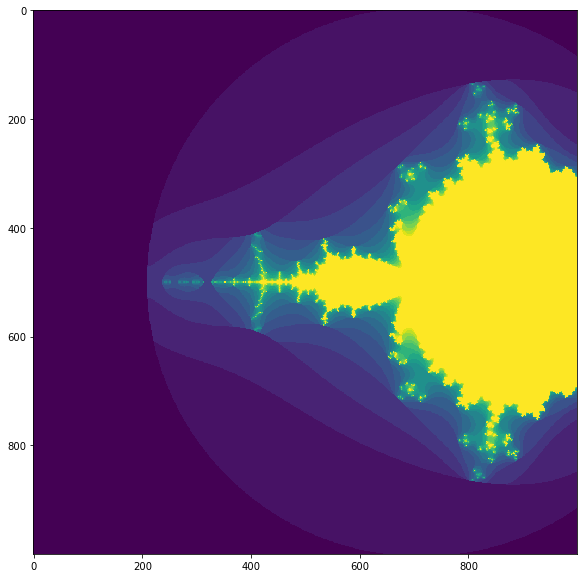

In [138]:
import matplotlib.pyplot as plt    #for plotting

def mandelbrot( h,w, maxit=20 ):
     #y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c=(np.linspace(-1.4,1.4,h))[:, None]*1j + (np.linspace(-2,0.8,w))[None, :]
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    for i in range(maxit):
        z = z**2 - z + c
        diverge = z*np.conj(z) > 2**2         # Who diverges?
        div_now = diverge & (divtime==maxit)  # Who diverges at this step?
        divtime[div_now] = i                  # Store the diverging ones
        z[diverge] = 2                        # Limit the number of diversions
    return divtime

# This is for the plotting, not important now
fig = plt.figure(figsize = (10,10))  
ax = fig.add_subplot(111)
ax.imshow(mandelbrot(1000,1000), interpolation='none')
plt.show()